<a href="https://colab.research.google.com/github/godpeny/laboratory/blob/master/Study/Deep_Learning_for_Everyone/Chapter_5/cnn_compared_with_general_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install sklearn
%pip install matplotlib

In [2]:
# import
import pandas as pd
import numpy as np

from google.colab import drive

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# General Model

In [11]:
"""
 data preprocessing phase

 detail expalin in 'cnn_data_preprocessing_explain'
"""
# load data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape 3D to 2D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# make element float to fit in 0 ~ 1 for train in 'Keras'
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.astype('float64')
X_test = X_test / 255

# convert result data type to categorical data
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
"""
modeling
"""
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
"""
checkpointers
"""
# using Google Drive
drive.mount('/d')
model_path = '/d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-general-model.hdf5'

checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=True)
early_stopping_checkpointer = EarlyStopping(monitor='val_loss', patience=10, verbose=True)

Drive already mounted at /d; to attempt to forcibly remount, call drive.mount("/d", force_remount=True).


In [6]:
"""
training
"""
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=False, callbacks=[checkpointer, early_stopping_checkpointer])
eval = model.evaluate(X_test, y_test)
print(eval)


Epoch 1: val_loss improved from inf to 0.18687, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-general-model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18687 to 0.13216, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-general-model.hdf5

Epoch 3: val_loss improved from 0.13216 to 0.11303, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-general-model.hdf5

Epoch 4: val_loss improved from 0.11303 to 0.10558, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-general-model.hdf5

Epoch 5: val_loss improved from 0.10558 to 0.09569, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-general-model.hdf5

Epoch 6: val_loss improved from 0.09569 to 0.09189, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-general-model.hdf5

Epoch 7: val_loss improved from 0.09189 to 0.08385, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-general-model.hdf5

Epoch 8: val_loss did not improve from 0.08385

Epoch 9: val_loss improved from 0.08385 to 0.08198, saving model to /d/My Drive/Colab N

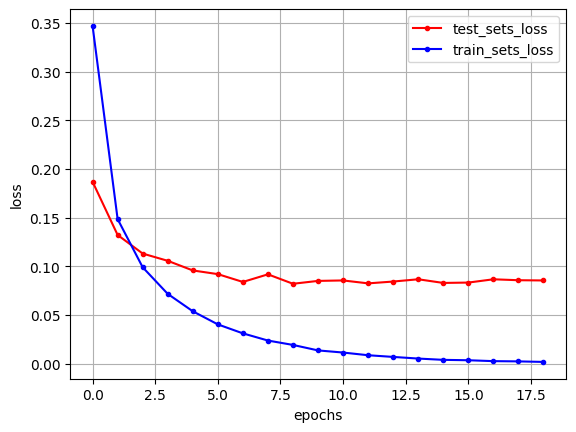

In [7]:
# show result on graph
val_loss = history.history['val_loss']
loss = history.history['loss']

x_len = np.arange(len(loss)) # 24 -> [0 1 2 3 ... 21 22 23]

plt.plot(x_len, val_loss, marker='.', c='red', label='test_sets_loss')
plt.plot(x_len, loss, marker='.', c='blue', label='train_sets_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Convolution Neural Network (CNN)

https://en.wikipedia.org/wiki/Convolutional_neural_network

https://kr.mathworks.com/discovery/convolutional-neural-network-matlab.html

In [3]:
"""
 data preprocessing phase in CNN

 detail expalin in 'cnn_data_preprocessing_explain'
"""
# load data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape for convolution layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) # (28,28,1) with last shape(color == black only) is 0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# make element float to fit in 0 ~ 1 for train in 'Keras'
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.astype('float64')
X_test = X_test / 255

# convert result data type to categorical data
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
"""
modeling with CNN layers
"""
cnn_model = Sequential()
# cnn layers #1 : convolution layers
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), data_format="channels_last")) # (28 * 28) + 1 black color
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3)))
# cnn layers #2 : max pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # using (2,2) window
# cnn layers #3 : drop out layer for avoiding overfitting
cnn_model.add(Dropout(0.25)) # off 25% nodes
# cnn layers #4 : flattening layer
cnn_model.add(Flatten())

# general layers
cnn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
cnn_model.add(Dropout(0.5)) # for avoiding overfitting
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

When using 'Conv2D' layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last". You can use None when a dimension has variable size.

In [5]:
"""
checkpointers
"""
# using Google Drive
drive.mount('/d')
model_path = '/d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-cnn-model.hdf5'

checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=True)
early_stopping_checkpointer = EarlyStopping(monitor='val_loss', patience=10, verbose=True)

Mounted at /d


In [6]:
"""
training
"""
cnn_history = cnn_model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=False, callbacks=[checkpointer, early_stopping_checkpointer])
eval = cnn_model.evaluate(X_test, y_test)
print(eval)


Epoch 1: val_loss improved from inf to 0.09595, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-cnn-model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.09595 to 0.07304, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-cnn-model.hdf5

Epoch 3: val_loss improved from 0.07304 to 0.05446, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-cnn-model.hdf5

Epoch 4: val_loss did not improve from 0.05446

Epoch 5: val_loss improved from 0.05446 to 0.04795, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-cnn-model.hdf5

Epoch 6: val_loss did not improve from 0.04795

Epoch 7: val_loss did not improve from 0.04795

Epoch 8: val_loss did not improve from 0.04795

Epoch 9: val_loss did not improve from 0.04795

Epoch 10: val_loss did not improve from 0.04795

Epoch 11: val_loss improved from 0.04795 to 0.04744, saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/cnn/best-cnn-model.hdf5

Epoch 12: val_loss did not improve from 0.04744

Epoch 13: val_loss did not improve from 0.04744

Epoch 14: val_loss did not improve from 0.04744

Ep

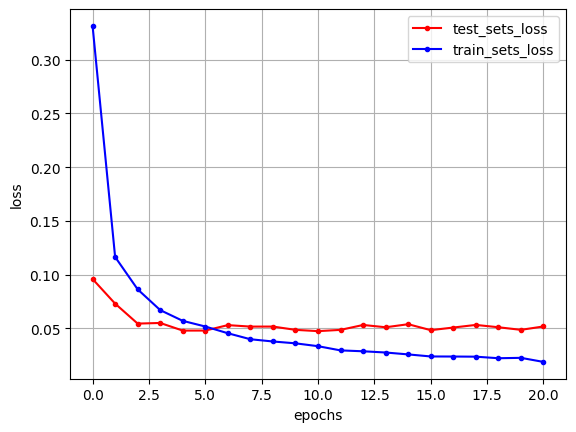

In [7]:
# show result on graph
val_loss = cnn_history.history['val_loss']
loss = cnn_history.history['loss']

x_len = np.arange(len(loss)) # 24 -> [0 1 2 3 ... 21 22 23]

plt.plot(x_len, val_loss, marker='.', c='red', label='test_sets_loss')
plt.plot(x_len, loss, marker='.', c='blue', label='train_sets_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()